**Importing necessary packages**

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

**Step 1: Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. If some features are missing, fill them in using the average of the same feature of other samples. Take a random 80% samples for training and the rest 20% for test.**

**Reading and analyzing dataset**

In [2]:
data = pd.read_csv("Titanic.csv")
data.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   object 
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


**Checking for null values**

In [4]:
null_val = data.isnull().sum()
print(null_val)

Unnamed: 0       0
pclass           0
survived         0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin         1014
embarked         2
boat           823
body          1188
home.dest      564
dtype: int64


In [5]:
[[i,v,data[i].dtype] for i,v in dict(null_val).items() if v > 0]

[['age', 263, dtype('float64')],
 ['fare', 1, dtype('float64')],
 ['cabin', 1014, dtype('O')],
 ['embarked', 2, dtype('O')],
 ['boat', 823, dtype('O')],
 ['body', 1188, dtype('float64')],
 ['home.dest', 564, dtype('O')]]

**Checking for categorical null values**

In [6]:
drop_list = []
print('Columns having more than one missing values\n')
for i,v in dict(null_val).items():
    if v > 2 and data[i].dtype not in ['float64', 'int64']:
        print('Column:',i,'\tMissing data:',v,'\n')
        drop_list.append(i)

Columns having more than one missing values

Column: cabin 	Missing data: 1014 

Column: boat 	Missing data: 823 

Column: home.dest 	Missing data: 564 



**Dropping categorical columns with null values**

In [7]:
data.drop(drop_list, axis = 1, inplace = True)
data.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,body
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,Southampton,NaN
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,Southampton,NaN
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,Southampton,NaN
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,Southampton,135.0
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,Southampton,NaN


In [8]:
data.drop(['body', 'embarked'], axis = 1, inplace = True)
data.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003


**Filling missing values with the mean of the non-missing values**

In [9]:
data.fillna(data.mean(), inplace = True)

In [10]:
data.isnull().sum()

Unnamed: 0    0
pclass        0
survived      0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
dtype: int64

In [11]:
data.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003


**Encoding the categorical variables**

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['pclass'] = le.fit_transform(data['pclass'])
data['sex'] = le.fit_transform(data['sex'])

In [13]:
data['pclass'].value_counts()

2    709
0    323
1    277
Name: pclass, dtype: int64

In [14]:
data['sex'].value_counts()

1    843
0    466
Name: sex, dtype: int64

**Creating the features and target from the given data and splitting it into train and test set with training size of 80% and testing size of 20%**

In [15]:
x = data.drop(['survived'], axis = 1)
y = data['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234, stratify = y)
print('Shape of:\nx_train =',x_train.shape, '\ty_train =', y_train.shape, '\nx_test =', x_test.shape, '\ty_test =', y_test.shape)

Shape of:
x_train = (1047, 9) 	y_train = (1047,) 
x_test = (262, 9) 	y_test = (262,)


**Step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code.**

In [16]:
column_list = ['pclass','sex', 'age', 'sibsp' ]
x_train = x_train[column_list]
x_test = x_test[column_list]
print('Shape of:\nx_train =',x_train.shape, '\ty_train =', y_train.shape, '\nx_test =', x_test.shape, '\ty_test =', y_test.shape)

Shape of:
x_train = (1047, 4) 	y_train = (1047,) 
x_test = (262, 4) 	y_test = (262,)


In [17]:
data['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [18]:
#Decision Tree Classifier Model
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)

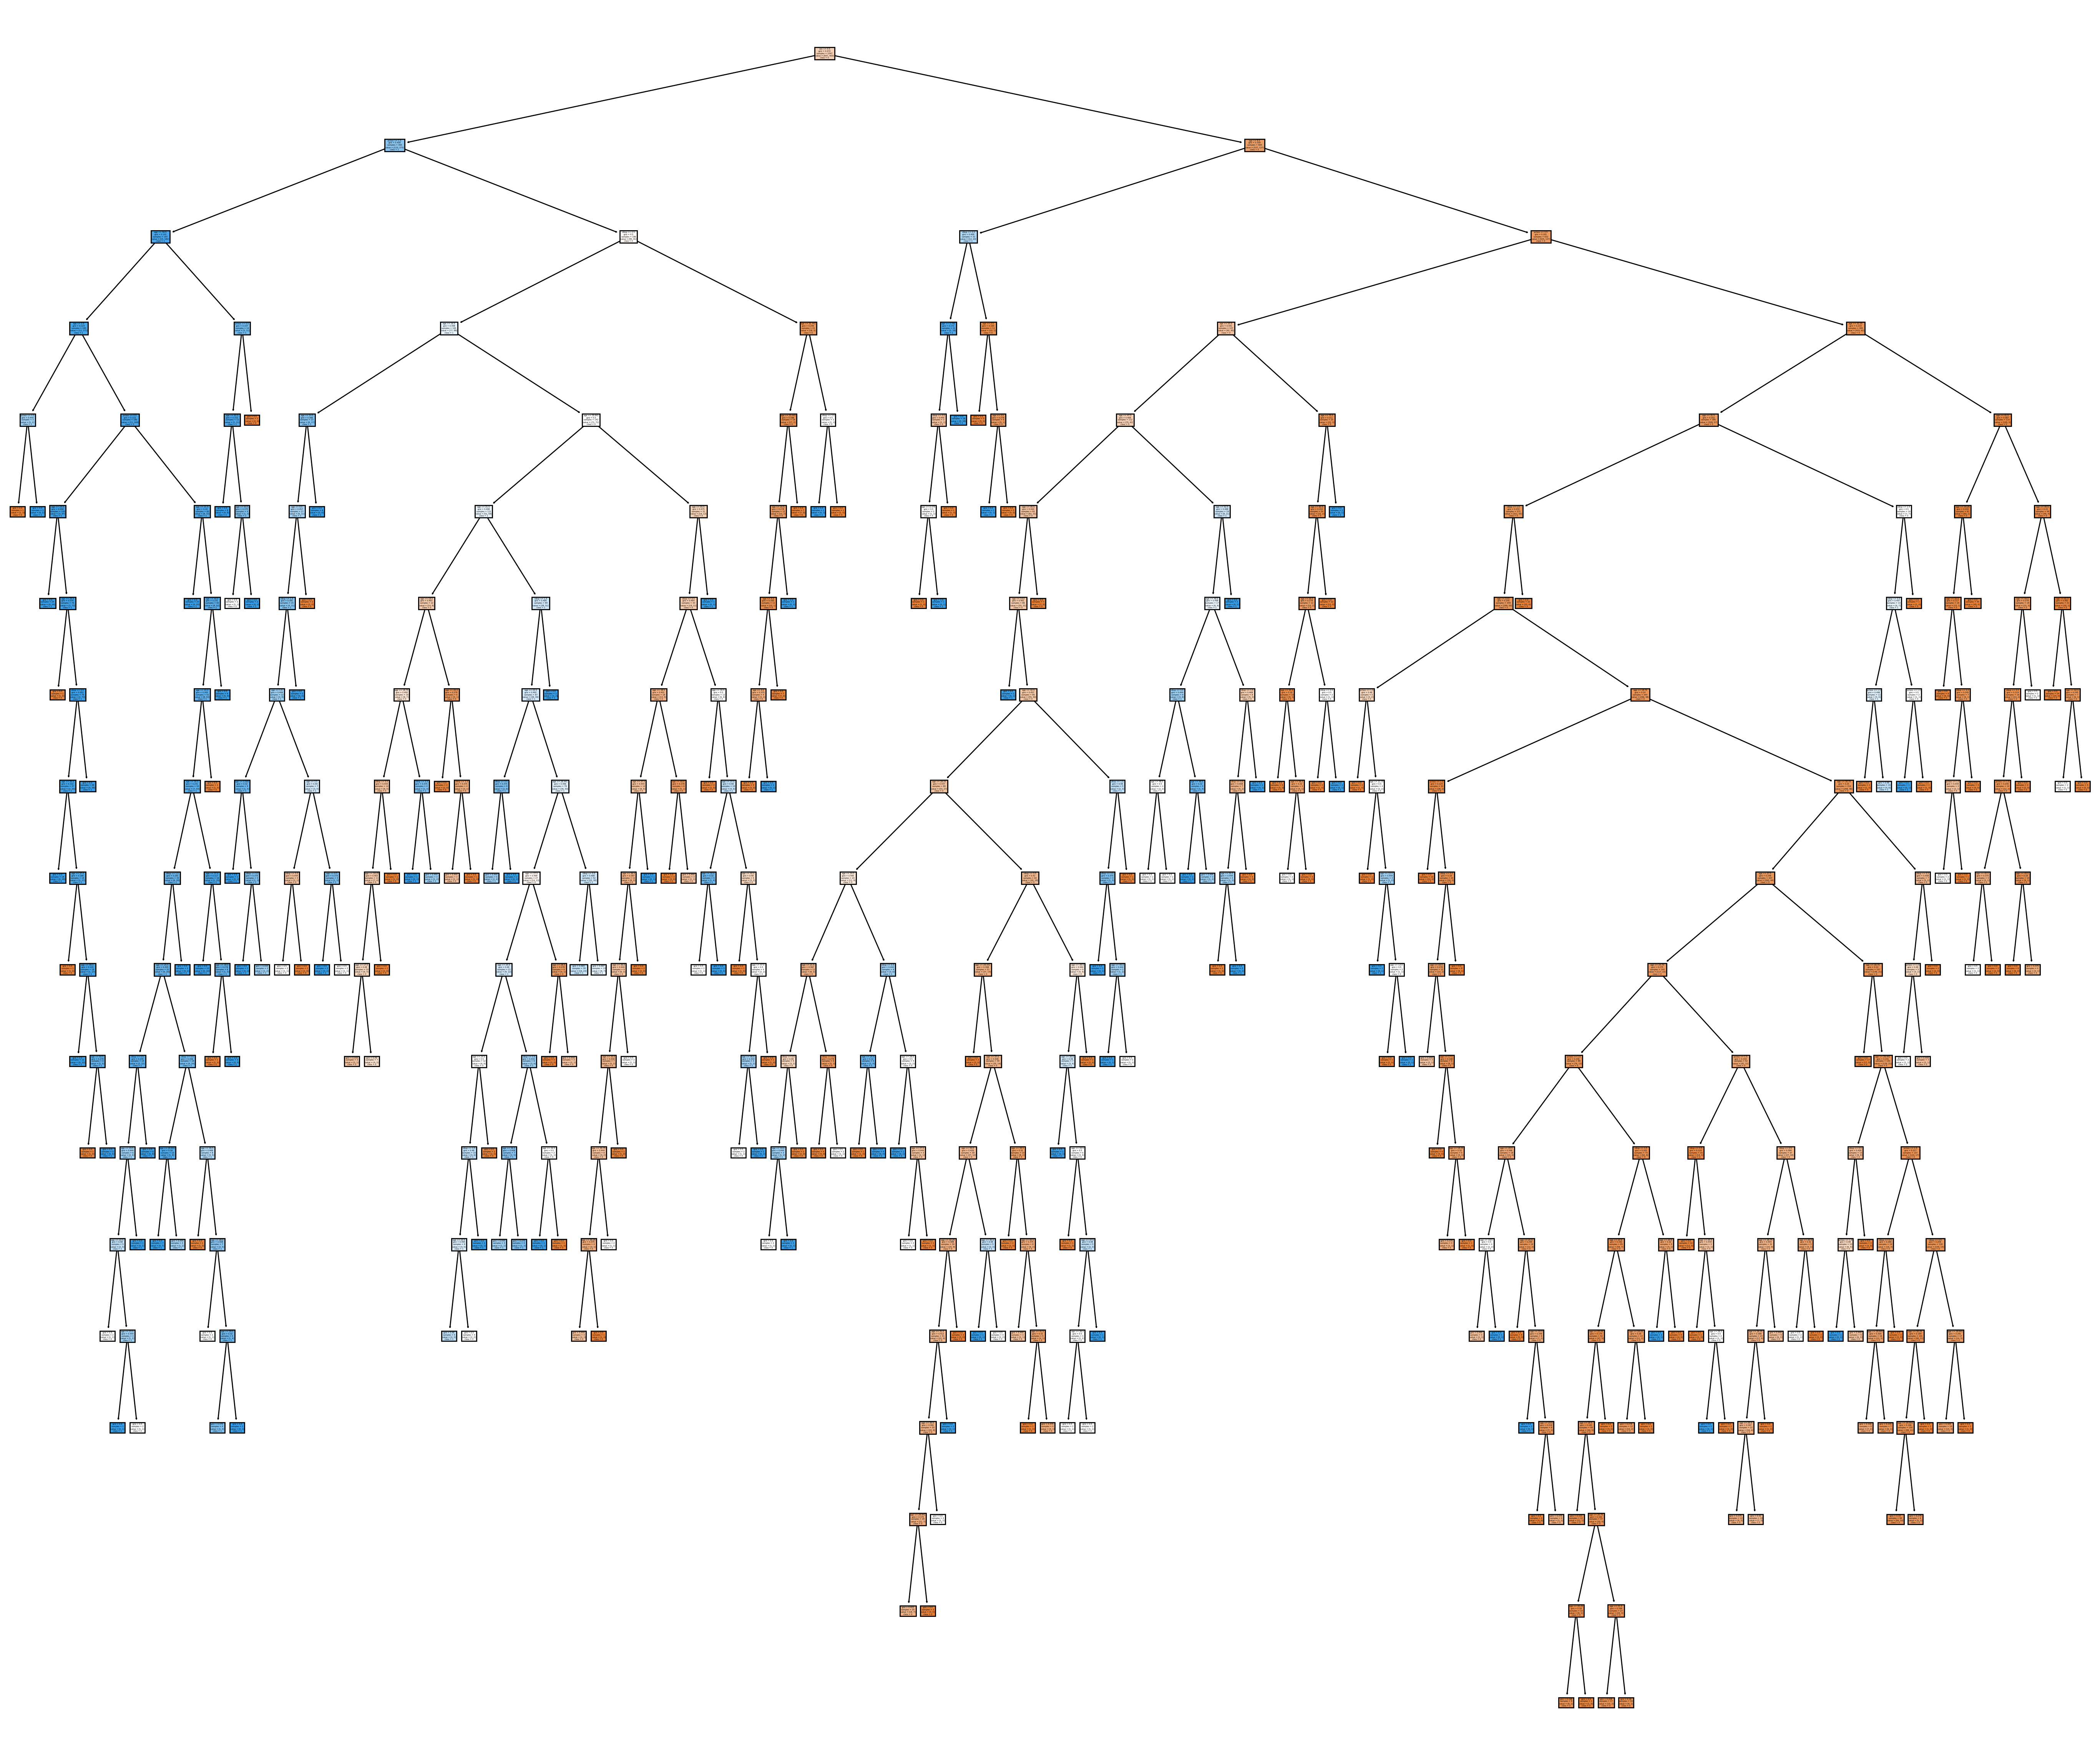

In [19]:
plt.figure(figsize = (35,30), dpi = 200)
model_plot = tree.plot_tree(model, feature_names = column_list, class_names = ['0','1'], filled = True)

In [20]:
y_pred = model.predict(x_test)

report = classification_report(y_test, y_pred, target_names = ['0','1'])
print("Classification Report for Decision Tree Classifier Model:\n \n", report)

Classification Report for Decision Tree Classifier Model:
 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       162
           1       0.73      0.62      0.67       100

    accuracy                           0.77       262
   macro avg       0.76      0.74      0.75       262
weighted avg       0.76      0.77      0.76       262



**Step 3: Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2.**

In [21]:
model_estimator = DecisionTreeClassifier()
params = {'max_leaf_nodes' : range(1,10)}
model_grid_search = GridSearchCV(model_estimator, params, verbose = 1)
model_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': range(1, 10)}, verbose=1)

In [22]:
best_val = model_grid_search.best_params_["max_leaf_nodes"]
print('Best score :', model_grid_search.best_score_)
print('Best params :', model_grid_search.best_params_)
print('Best Estimator :',model_grid_search.best_estimator_)

Best score : 0.8013078149920254
Best params : {'max_leaf_nodes': 8}
Best Estimator : DecisionTreeClassifier(max_leaf_nodes=8)


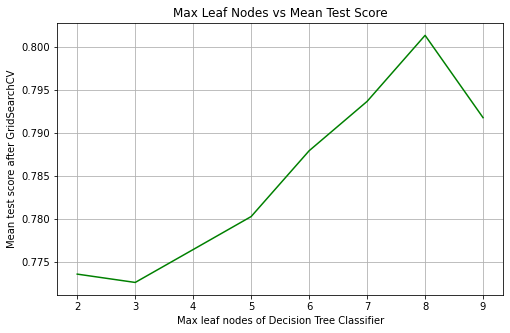

In [23]:
plt.figure(figsize = (8,5))
plt.plot(range(1,10),model_grid_search.cv_results_['mean_test_score'],'g-')
plt.title('Max Leaf Nodes vs Mean Test Score')
plt.xlabel('Max leaf nodes of Decision Tree Classifier')
plt.ylabel('Mean test score after GridSearchCV')
plt.grid()

**Thus the best parameter is : Max leaf nodes = 8**

**Creating a Decision Tree Classifier with the best value of maximum leaf nodes as obtained from GridSearchCV**

In [24]:
model_best_val = DecisionTreeClassifier(max_leaf_nodes = best_val)
model_best_val = model_best_val.fit(x_train, y_train)

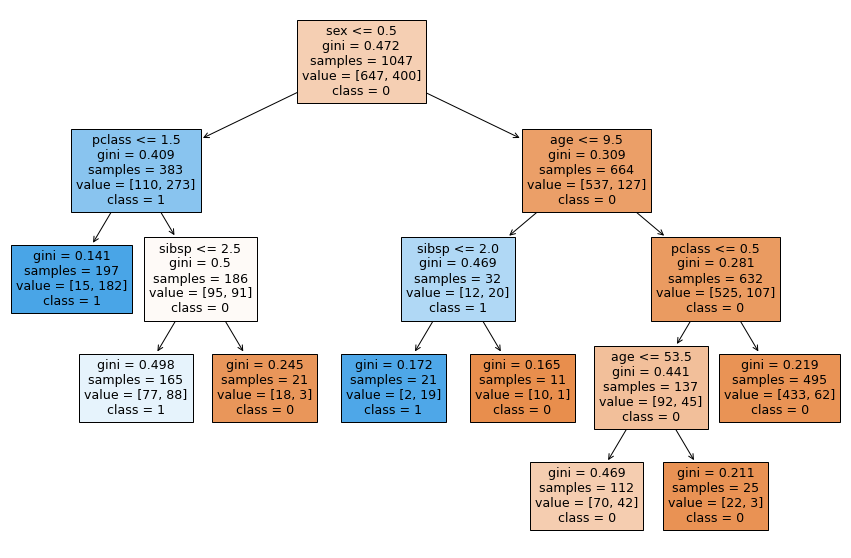

In [25]:
plt.figure(figsize = (15,10))
model_best_val_plot = tree.plot_tree(model_best_val, feature_names = column_list, 
                            class_names = ['0','1'], filled = True)

In [35]:
y_pred = model_best_val.predict(x_test)

report = classification_report(y_test, y_pred, target_names = ['0','1'])
print("Classification Report for Decision Tree Classifier Model with Best Value for Maximum Leaf Nodes:\n \n", report)

Classification Report for Decision Tree Classifier Model with Best Value for Maximum Leaf Nodes:
 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       162
           1       0.80      0.71      0.75       100

    accuracy                           0.82       262
   macro avg       0.82      0.80      0.81       262
weighted avg       0.82      0.82      0.82       262



**Step 4: For the pruned tree, report its accuracy on the test set for the following:
percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)**

In [36]:
corr_pred_survivors = sum(np.logical_and((y_pred == 1),(y_test == 1)))
tot_survivors = sum(y_test == 1)

corr_pred_fatalities = sum(np.logical_and((y_pred == 0),(y_test == 0)))
tot_fatalities = sum(y_test == 0)

print('Percent of survivors correctly predicted (on test set):',(corr_pred_survivors/tot_survivors)*100,'%')
print('Percent of fatalities correctly predicted (on test set):', '%.2f' %((corr_pred_fatalities/tot_fatalities)*100),'%')

Percent of survivors correctly predicted (on test set): 71.0 %
Percent of fatalities correctly predicted (on test set): 88.89 %


**Step 5: Use the RandomForestClassifier() function to train a random forest using the value of max_leaf_nodes you found in Step 3. You can set n_estimators as 50. Report the accuracy of random forest on the test set for the following:
percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)**

In [28]:
model_rf = RandomForestClassifier(n_estimators = 50, max_leaf_nodes = best_val)
model_rf = model_rf.fit(x_train, y_train)

In [29]:
y_pred = model_rf.predict(x_test)

report = classification_report(y_test, y_pred, target_names = ['0','1'])
print("Classification Report for Random Forest Classifier Model with Best Value for Maximum Leaf Nodes:\n \n", report)

Classification Report for Random Forest Classifier Model with Best Value for Maximum Leaf Nodes:
 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       162
           1       0.80      0.70      0.74       100

    accuracy                           0.82       262
   macro avg       0.81      0.79      0.80       262
weighted avg       0.82      0.82      0.81       262



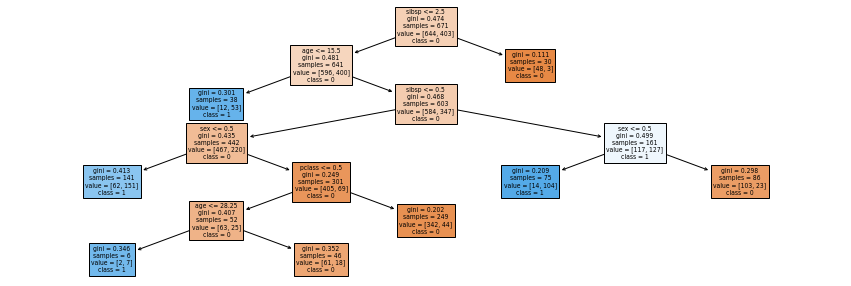

In [30]:
plt.figure(figsize = (15,5))
model_rf_plot = tree.plot_tree(model_rf.estimators_[0], feature_names = column_list, 
                            class_names = ['0','1'], filled = True)

In [31]:
corr_pred_survivors = sum(np.logical_and((y_pred == 1),(y_test == 1)))
tot_survivors = sum(y_test == 1)

corr_pred_fatalities = sum(np.logical_and((y_pred == 0),(y_test == 0)))
tot_fatalities = sum(y_test == 0)

print('Percent of survivors correctly predicted (on test set):',(corr_pred_survivors/tot_survivors)*100,'%')
print('Percent of fatalities correctly predicted (on test set):', '%.2f' %((corr_pred_fatalities/tot_fatalities)*100),'%')

Percent of survivors correctly predicted (on test set): 70.0 %
Percent of fatalities correctly predicted (on test set): 88.89 %


**Check whether there is improvement as compared to a single tree obtained in Step 4.**

From the values of accuracy of prediction of survivors and fatalities using a Decision Tree Classifier and a Random Forest Classifier:

Accuracy using Decision Tree Classifier:
Percent of survivors correctly predicted (on test set): 71.0 %
Percent of fatalities correctly predicted (on test set): 88.89 %

Accuracy using Random Forest Classifier:
Percent of survivors correctly predicted (on test set): 70.0 %
Percent of fatalities correctly predicted (on test set): 90.12 %

We can see that there is not much improvement in the accuracy and that both the models perform similarly on the given dataset.